In [ ]:
# -*- coding: utf-8 -*

'''
data importion
'''
import numpy as np  # for matrix calculation
import matplotlib.pyplot as plt  

# load the CSV file as a numpy matrix
dataset = np.loadtxt('../data/watermelon_3a.csv', delimiter=",")

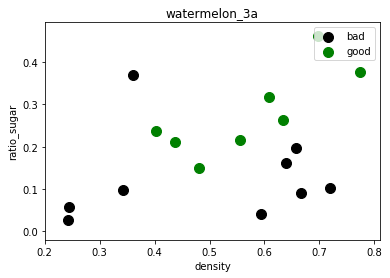

In [5]:
# separate the data from the target attributes
X = dataset[:,1:3]
y = dataset[:,3]

m,n = np.shape(X)  

# draw scatter diagram to show the raw data
f1 = plt.figure(1)       
plt.title('watermelon_3a')  
plt.xlabel('density')  
plt.ylabel('ratio_sugar')  
plt.scatter(X[y == 0,0], X[y == 0,1], marker = 'o', color = 'k', s=100, label = 'bad')
plt.scatter(X[y == 1,0], X[y == 1,1], marker = 'o', color = 'g', s=100, label = 'good')
plt.legend(loc = 'upper right')  
plt.show()

In [6]:
''' 
using sklearn lib for logistic regression
'''
from sklearn import metrics
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import matplotlib.pylab as pl

# generalization of test and train set
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.5, random_state=0)

# model training
log_model = LogisticRegression()  # using log-regression lib model
log_model.fit(X_train, y_train)  # fitting

# model validation
y_pred = log_model.predict(X_test)

# summarize the fit of the model
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred)    


[[4 1]
 [1 3]]
             precision    recall  f1-score   support

        0.0       0.80      0.80      0.80         5
        1.0       0.75      0.75      0.75         4

avg / total       0.78      0.78      0.78         9



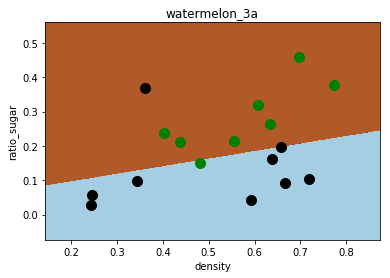

In [7]:
# show decision boundary in plt
# X - some data in 2dimensional np.array
f2 = plt.figure(2) 
h = 0.001
x0_min, x0_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
x1_min, x1_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
x0, x1 = np.meshgrid(np.arange(x0_min, x0_max, h),
                     np.arange(x1_min, x1_max, h))

# here "model" is your model's prediction (classification) function
z = log_model.predict(np.c_[x0.ravel(), x1.ravel()]) 


# Put the result into a color plot
z = z.reshape(x0.shape)
plt.contourf(x0, x1, z, cmap = pl.cm.Paired )

# Plot also the training pointsplt.title('watermelon_3a')  
plt.title('watermelon_3a')  
plt.xlabel('density')  
plt.ylabel('ratio_sugar')  
plt.scatter(X[y == 0,0], X[y == 0,1], marker = 'o', color = 'k', s=100, label = 'bad')
plt.scatter(X[y == 1,0], X[y == 1,1], marker = 'o', color = 'g', s=100, label = 'good')
plt.show()

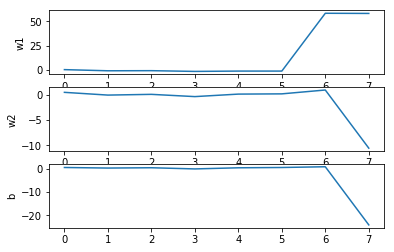

[[ 3.  2.]
 [ 0.  4.]]


In [8]:
'''
coding to implement logistic regression
'''
from sklearn import model_selection

import self_def

# X_train, X_test, y_train, y_test
np.ones(n)
m,n = np.shape(X)
X_ex = np.c_[X, np.ones(m)]  # extend the variable matrix to [x, 1]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_ex, y, test_size=0.5, random_state=0)


# using gradDescent to get the optimal parameter beta = [w, b] in page-59 
beta = self_def.gradDscent_2(X_train, y_train)

# prediction, beta mapping to the model
y_pred = self_def.predict(X_test, beta)

m_test = np.shape(X_test)[0]
# calculation of confusion_matrix and prediction accuracy
cfmat = np.zeros((2,2))
for i in range(m_test):   
    if y_pred[i] == y_test[i] == 0: cfmat[0,0] += 1 
    elif y_pred[i] == y_test[i] == 1: cfmat[1,1] += 1 
    elif y_pred[i] == 0: cfmat[1,0] += 1 
    elif y_pred[i] == 1: cfmat[0,1] += 1 
                                
print(cfmat)